# Project Concrete 

_Project Concrete_ aims to correlate, visualize and predict real estate prices based on the relationship between various
factors such as unemployment rate, disposable income and population growth in Austria.


Data Sources used for this endeavour - All datapoints are given for each district of Vienna
- [Unemployment Rates (Source: data.gv.at)](https://www.data.gv.at/katalog/dataset/CFE2FF7E9AD53C1EE053C630070AB105)
- [Net Income Vienna (Source: wien.gv.at)](https://www.wien.gv.at/statistik/bezirke/)
- [Population Growth (Source: wien.gv.at)](https://www.wien.gv.at/statistik/bevoelkerung/bevoelkerungsstand/index.html)
- [Real Estate Prices Vienna (Source: data.gv.at)](https://www.data.gv.at/katalog/dataset/kaufpreissammlung-liegenschaften-wien/resource/7b9bdd2d-2ff0-4e6e-bba5-21483d8cf55b)


Planned execution steps:
- Data aggregation and collection (see Planned Data Sources)
- Data preperation and import into MongoDB
- Analysis of data via Jupyter Notebook and MapReduce
- Presentation and visualization of results (i.e. map of Austria/Vienna, etc.)


### Install pymongo

In [76]:
!pip install pymongo
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install mrjob

### Connect to DB via connection string

In [77]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Provide the mongodb atlas url to connect python to mongodb using pymongo
CONNECTION_STRING = "mongodb://127.0.0.1:27017"

# Create a connection using MongoClient
myclient = MongoClient(CONNECTION_STRING)

print("Connection Successful")

# Check DB 
for db in myclient.list_databases():
    print(db)

Connection Successful
{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'config', 'sizeOnDisk': 36864, 'empty': False}
{'name': 'immodb', 'sizeOnDisk': 10592256, 'empty': False}
{'name': 'local', 'sizeOnDisk': 73728, 'empty': False}


## Importing the data
First of all, we have to import all of the data files into a proper dataframe, this is for easy insertion into the DB later

For this step we use the Pandas read_csv function, for more info on the exact data format consult the Data Sources section

### Unemployment Data CSV from 2002


In [78]:
unemploy_df = pd.read_csv('emp-bez-alp.csv', sep = ";", decimal=',', thousands =".")
unemploy_df

,NUTS1,NUTS2,NUTS3,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_DATE,REF_YEAR,ALP_TOT_VALUE,ALP_MAL_VALUE,ALP_FEM_VALUE,ALP_TOT_DENSITY,ALP_MAL_DENSITY,ALP_FEM_DENSITY
0,AT1,AT13,AT130,90000,90000,20020101,2002,74894,44966,29928,68.5,83.5,54.0
1,AT1,AT13,AT130,90100,90100,20020101,2002,433,232,201,35.4,19.0,16.5
2,AT1,AT13,AT130,90200,90200,20020101,2002,4784,2933,1851,77.7,47.6,30.1
3,AT1,AT13,AT130,90300,90300,20020101,2002,3957,2403,1554,68.7,41.7,27.0
4,AT1,AT13,AT130,90400,90400,20020101,2002,1140,668,472,56.6,33.1,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,AT1,AT13,AT130,91900,91900,20190101,2019,3850,2091,1759,82.6,44.9,37.8
428,AT1,AT13,AT130,92000,92000,20190101,2019,8750,4976,3774,143.9,81.8,62.1
429,AT1,AT13,AT130,92100,92100,20190101,2019,12823,6943,5880,115.6,62.6,53.0
430,AT1,AT13,AT130,92200,92200,20190101,2019,11762,6006,5756,90.6,46.2,44.3


### Population Growth Data in Vienna from 2002


In [79]:
pop_growth_df = pd.read_csv('tab_5.1.2_bevoelkerungsstandund-veraenderung_.csv', sep = ";", decimal='.', encoding='utf-8')
pop_growth_df

,Jahr,Wien,1. Innere Stadt,2. Leopoldstadt,3. Landstrasse,4. Wieden,5. Margareten,6. Mariahilf,7. Neubau,8. Josefstadt,...,14. Penzing,15. Rudolfsheim-Fuenfhaus,16. Ottakring,17. Hernals,18. Waehring,19. Doebling,20. Brigittenau,21. Floridsdorf,22. Donaustadt,23. Liesing
0,2002,1571123,17630,89016,82227,28975,49785,28525,28912,22219,...,79142,67482,87914,48827,45505,65327,76837,129726,138100,85791
1,2003,1592846,17541,89954,82297,29348,50367,28805,28968,23156,...,80185,67976,89153,49428,45872,66017,78792,131892,140404,86486
2,2004,1610410,17384,90837,83019,29394,51098,28891,29012,23309,...,80505,68760,89822,50278,46309,66437,79441,133801,142620,87080
3,2005,1632569,17294,91364,83827,29573,51882,29012,29161,23588,...,81785,69467,91997,51316,46921,66900,80758,134904,144820,87716
4,2006,1652449,17285,92170,84208,30126,52534,29369,30416,23597,...,82829,70235,93817,52480,47291,67389,81288,136625,146892,89078
5,2007,1661246,17147,93313,83919,30189,52286,29463,29955,23613,...,83246,70228,93877,52626,47333,67832,81719,137335,149083,90291
6,2008,1671221,16976,93463,83050,30262,52434,29430,30054,23703,...,83751,70291,94193,52414,47478,67961,81648,138678,150967,91192
7,2009,1680135,16623,93822,82979,30348,52288,29197,29878,23639,...,83980,70600,94526,52253,47619,67837,81986,139498,153148,91623
8,2010,1689995,16525,94735,83061,30331,52354,29323,30069,23435,...,84090,70830,94816,52328,47693,67865,82083,140647,155527,92252
9,2011,1702855,16385,95302,83955,30541,52753,29308,30062,23379,...,84566,71491,94951,52293,47575,68079,82969,142199,158417,93374


### Real Estate Purchase list from 1990 (Kaufpreissammlung Liegenschaften Wien)


In [80]:
real_estate_vienna_df = pd.read_csv('kaufpreissammlung-liegenschaften.csv', sep = ";", decimal=',', encoding='latin-1', low_memory=False)
real_estate_vienna_df

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
0,1617,Strebersdorf,1417.0,1210.0,Mühlweg,13,752/16,755.0,Kaufvertrag,13.10.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,750000.0,NaN
1,1607,Groß Jedlersdorf II,193.0,1210.0,Bahnsteggasse,4,408,510.0,Kaufvertrag,13.09.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1250000.0,NaN
2,1209,Ober St.Veit,3570.0,1130.0,Jennerplatz,34/20,938/3,456.0,Kaufvertrag,10.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,480000.0,NaN
3,1207,Lainz,405.0,1130.0,Sebastian-Brunner-Gasse,6,8/23,523.0,Kaufvertrag,30.12.2020,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1600000.0,NaN
4,1101,Favoriten,3831.0,1100.0,Laxenburger Straße,2C -2 D,2044/19,12768.0,Kaufvertrag,04.11.2020,...,FALSCH,30.0,FALSCH,NaN,NaN,FALSCH,"W V 22 g , Wi g","40 ,30",15000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57907,1204,Hadersdorf,1057.0,1140.0,Laskywiesengasse,10,889,1313.0,Kaufvertrag,18.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,950000.0,NaN
57908,1204,Hadersdorf,1200.0,1140.0,Robert-Fuchs-Gasse,25-31,448,4003.0,Kaufvertrag,05.12.2018,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,5200000.0,NaN
57909,1206,Hütteldorf,2760.0,1140.0,Ulmenstraße,48,1232/1,499.0,Kaufvertrag,15.06.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,699000.0,NaN
57910,1216,Weidlingau,5.0,1140.0,Hauptstraße,114,11/2,1649.0,Kaufvertrag,26.07.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1496000.0,NaN


### Net Income Data in Vienna from 2002

In [81]:
net_income_vienna_df = pd.read_csv('vie-bez-biz-ecn-inc-sex-2002f.csv', sep=';', decimal=',')
net_income_vienna_df

,NUTS,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_YEAR,REF_DATE,INC_TOT_VALUE,INC_MAL_VALUE,INC_FEM_VALUE
0,AT13,90000,90000,2002,20021231,18.217,20.709,15.424
1,AT13,90100,90100,2002,20021231,25.463,31.961,18.536
2,AT13,90200,90200,2002,20021231,16.439,18.301,14.282
3,AT13,90300,90300,2002,20021231,18.701,21.444,15.804
4,AT13,90400,90400,2002,20021231,20.325,23.641,16.876
...,...,...,...,...,...,...,...,...
451,AT13,91900,91900,2020,20201231,29.195,34.102,24.257
452,AT13,92000,92000,2020,20201231,20.671,21.591,19.531
453,AT13,92100,92100,2020,20201231,24.061,26.202,21.693
454,AT13,92200,92200,2020,20201231,26.272,29.302,23.100


### Create collection
In the next step, we insert our dataframes into our permanent data store of choice, MongoDB

In [86]:
# In MongoDB collections and DBs are only created on first insert (reminiscent of Git folders)
db = myclient["immodb"]

# We insert the whole dateframes into the DB

# Insert unemploymentData
db.unemploymentData.insert_many(unemploy_df.to_dict('records'))
# Insert populationGrowth
db.populationGrowth.insert_many(pop_growth_df.to_dict('records'))
# Insert realEstateVienna
db.realEstateVienna.insert_many(real_estate_vienna_df.to_dict('records'))
# Insert netIncomeVienna
db.netIncomeVienna.insert_many(net_income_vienna_df.to_dict('records'))

# Check if colletions have been created
print(db.list_collection_names())

['netIncomeVienna', 'realEstateVienna', 'populationGrowth', 'unemploymentData']


Now for sanity checking, we can output the rowcount of our MongoDB collections!

In [87]:
db = myclient["immodb"]
unemp_col = db["unemploymentData"]
populationGrowth_col = db["populationGrowth"]
realEstateVienna_col = db["realEstateVienna"]
netIncomeVienna_col = db["netIncomeVienna"]

data = [(unemp_col.find(), 'Unemployment Data'), (populationGrowth_col.find(), 'Population Growth'), (realEstateVienna_col.find(), 'Real Estate Sales'), (netIncomeVienna_col.find(), 'Net Income')]
for (cur, title) in data:
    print(title, '\nRow Count: ', len(list(cur)))

Unemployment Data 
Row Count:  432
Population Growth 
Row Count:  19
Real Estate Sales 
Row Count:  57912
Net Income 
Row Count:  456


And we can also drop all of our data, i.e. in case something about our sources changes

In [84]:
# Drop all collections
# db["unemploymentData"].drop()
# db["populationGrowth"].drop()
# db["realEstateVienna"].drop()
# db["netIncomeVienna"].drop()

### Load from database
In this step, we read in all of our data from the MongoDB into Pandas dataframes!

#### Unemployment Data

In [88]:
unemployment_fromDb = pd.DataFrame(list(unemp_col.find()))
unemployment_fromDb = unemployment_fromDb.set_index("_id")
unemployment_fromDb

,NUTS1,NUTS2,NUTS3,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_DATE,REF_YEAR,ALP_TOT_VALUE,ALP_MAL_VALUE,ALP_FEM_VALUE,ALP_TOT_DENSITY,ALP_MAL_DENSITY,ALP_FEM_DENSITY
_id,,,,,,,,,,,,,
6267f5c6cee0d9e93d503cab,AT1,AT13,AT130,90000,90000,20020101,2002,74894,44966,29928,68.5,83.5,54.0
6267f5c6cee0d9e93d503cac,AT1,AT13,AT130,90100,90100,20020101,2002,433,232,201,35.4,19.0,16.5
6267f5c6cee0d9e93d503cad,AT1,AT13,AT130,90200,90200,20020101,2002,4784,2933,1851,77.7,47.6,30.1
6267f5c6cee0d9e93d503cae,AT1,AT13,AT130,90300,90300,20020101,2002,3957,2403,1554,68.7,41.7,27.0
6267f5c6cee0d9e93d503caf,AT1,AT13,AT130,90400,90400,20020101,2002,1140,668,472,56.6,33.1,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267f5c6cee0d9e93d503e56,AT1,AT13,AT130,91900,91900,20190101,2019,3850,2091,1759,82.6,44.9,37.8
6267f5c6cee0d9e93d503e57,AT1,AT13,AT130,92000,92000,20190101,2019,8750,4976,3774,143.9,81.8,62.1
6267f5c6cee0d9e93d503e58,AT1,AT13,AT130,92100,92100,20190101,2019,12823,6943,5880,115.6,62.6,53.0


#### Population Growth in Vienna

In [89]:
populationGrowth_fromDb = pd.DataFrame(list(populationGrowth_col.find()))
populationGrowth_fromDb = populationGrowth_fromDb.set_index("_id")
populationGrowth_fromDb

,Jahr,Wien,1. Innere Stadt,2. Leopoldstadt,3. Landstrasse,4. Wieden,5. Margareten,6. Mariahilf,7. Neubau,8. Josefstadt,...,14. Penzing,15. Rudolfsheim-Fuenfhaus,16. Ottakring,17. Hernals,18. Waehring,19. Doebling,20. Brigittenau,21. Floridsdorf,22. Donaustadt,23. Liesing
_id,,,,,,,,,,,,,,,,,,,,,
6267f5c6cee0d9e93d503e5b,2002,1571123,17630,89016,82227,28975,49785,28525,28912,22219,...,79142,67482,87914,48827,45505,65327,76837,129726,138100,85791
6267f5c6cee0d9e93d503e5c,2003,1592846,17541,89954,82297,29348,50367,28805,28968,23156,...,80185,67976,89153,49428,45872,66017,78792,131892,140404,86486
6267f5c6cee0d9e93d503e5d,2004,1610410,17384,90837,83019,29394,51098,28891,29012,23309,...,80505,68760,89822,50278,46309,66437,79441,133801,142620,87080
6267f5c6cee0d9e93d503e5e,2005,1632569,17294,91364,83827,29573,51882,29012,29161,23588,...,81785,69467,91997,51316,46921,66900,80758,134904,144820,87716
6267f5c6cee0d9e93d503e5f,2006,1652449,17285,92170,84208,30126,52534,29369,30416,23597,...,82829,70235,93817,52480,47291,67389,81288,136625,146892,89078
6267f5c6cee0d9e93d503e60,2007,1661246,17147,93313,83919,30189,52286,29463,29955,23613,...,83246,70228,93877,52626,47333,67832,81719,137335,149083,90291
6267f5c6cee0d9e93d503e61,2008,1671221,16976,93463,83050,30262,52434,29430,30054,23703,...,83751,70291,94193,52414,47478,67961,81648,138678,150967,91192
6267f5c6cee0d9e93d503e62,2009,1680135,16623,93822,82979,30348,52288,29197,29878,23639,...,83980,70600,94526,52253,47619,67837,81986,139498,153148,91623
6267f5c6cee0d9e93d503e63,2010,1689995,16525,94735,83061,30331,52354,29323,30069,23435,...,84090,70830,94816,52328,47693,67865,82083,140647,155527,92252


#### Real Estate Purchase List Vienna


In [90]:
realEstateVienna_fromDb = pd.DataFrame(list(realEstateVienna_col.find()))
realEstateVienna_fromDb = realEstateVienna_fromDb.set_index("_id")
realEstateVienna_fromDb

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
_id,,,,,,,,,,,,,,,,,,,,,
6267f5c7cee0d9e93d503e6e,1617,Strebersdorf,1417.0,1210.0,Mühlweg,13,752/16,755.0,Kaufvertrag,13.10.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,750000.0,NaN
6267f5c7cee0d9e93d503e6f,1607,Groß Jedlersdorf II,193.0,1210.0,Bahnsteggasse,4,408,510.0,Kaufvertrag,13.09.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1250000.0,NaN
6267f5c7cee0d9e93d503e70,1209,Ober St.Veit,3570.0,1130.0,Jennerplatz,34/20,938/3,456.0,Kaufvertrag,10.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,480000.0,NaN
6267f5c7cee0d9e93d503e71,1207,Lainz,405.0,1130.0,Sebastian-Brunner-Gasse,6,8/23,523.0,Kaufvertrag,30.12.2020,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1600000.0,NaN
6267f5c7cee0d9e93d503e72,1101,Favoriten,3831.0,1100.0,Laxenburger Straße,2C -2 D,2044/19,12768.0,Kaufvertrag,04.11.2020,...,FALSCH,30.0,FALSCH,NaN,NaN,FALSCH,"W V 22 g , Wi g","40 ,30",15000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267f5c7cee0d9e93d5120a1,1204,Hadersdorf,1057.0,1140.0,Laskywiesengasse,10,889,1313.0,Kaufvertrag,18.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,950000.0,NaN
6267f5c7cee0d9e93d5120a2,1204,Hadersdorf,1200.0,1140.0,Robert-Fuchs-Gasse,25-31,448,4003.0,Kaufvertrag,05.12.2018,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,5200000.0,NaN
6267f5c7cee0d9e93d5120a3,1206,Hütteldorf,2760.0,1140.0,Ulmenstraße,48,1232/1,499.0,Kaufvertrag,15.06.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,699000.0,NaN


### Cleaning Real Estate Price List
For this particular dataframe we need to take extra care, removing NaN values in the columns we're interested in! 

In [91]:
# Clean out NaN values for purchasing date and purchasing price
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['ber. Kaufpreis'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['Erwerbsdatum'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['/m² Gfl.'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[realEstateVienna_fromDb['/m² Gfl.'] > 0]

# Sort by date, time series
realEstateVienna_fromDb.sort_values("Erwerbsdatum")

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
_id,,,,,,,,,,,,,,,,,,,,,
6267f5c7cee0d9e93d506541,1654,Eßling,4521.0,1220.0,Telephonweg,westl.,447,10000.0,Kaufvertrag,01.01.1990,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,87207.0,NaN
6267f5c7cee0d9e93d50b52b,1613,Leopoldau,58.0,1210.0,Oskar-Grissemann-Straße,55,2337/1,7.0,Magistratsbeschluss,01.01.2006,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1960.0,NaN
6267f5c7cee0d9e93d5043b5,1803,Inzersdorf,4013.0,1230.0,SLAMASTRASSE,NaN,1568/26,1757.0,Kaufvertrag,01.02.1985,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,86827.0,NaN
6267f5c7cee0d9e93d50465d,1660,Kagran,2565.0,1220.0,WAGRAMER STRASSE,208,1262/15,73.0,Kaufvertrag,01.02.1988,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,3714.0,NaN
6267f5c7cee0d9e93d50465e,1660,Kagran,2565.0,1220.0,WAGRAMER STRASSE,208,166/32,8.0,Kaufvertrag,01.02.1988,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,757.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267f5c7cee0d9e93d50732e,1210,Penzing,519.0,1140.0,LINZER STRASSE,195,314/3,46.0,Kaufvertrag,31.12.1992,...,WAHR,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,13372.0,NaN
6267f5c7cee0d9e93d508f22,1006,Landstraße,2018.0,1030.0,Schnirchgasse,hinter 16-24,2327/1,2938.0,Kaufvertrag,31.12.1997,...,FALSCH,40.0,FALSCH,NaN,NaN,FALSCH,VB,60,1380784.0,NaN
6267f5c7cee0d9e93d508a9f,1401,Dornbach,2667.0,1170.0,Kleegasse,20,637/20,1.0,Magistratsbeschluss,31.12.1997,...,WAHR,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,327.0,NaN


# Data Analysis
In this step, we analyze our dataframes. At first we will get an overview about the data with simple charts. Afterwards we will analyze correlations and relationships between the data and generate forecasts with it. 

At first we use bar charts to get an overview of the data

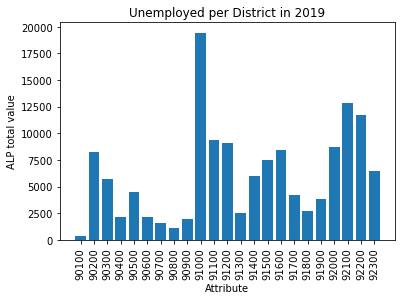

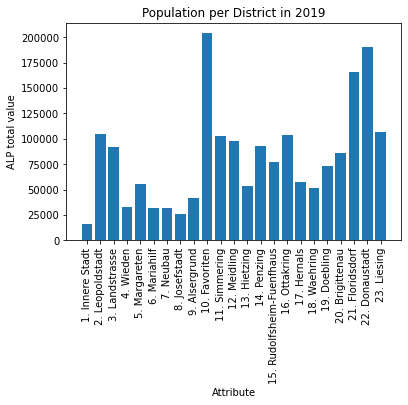

In [171]:
def flatten(t):
    return [item for sublist in t for item in sublist]

attributes = ['90100', '90200', '90300', '90400', '90500', '90600', '90700', '90800', '90900', '91000', '91100', '91200', '91300', '91400', '91500', '91600', '91700', '91800', '91900', '92000', '92100', '92200', '92300']
column_totals = [0] * 23
i = 0
for plz in attributes:
    # unemp_dist = unemployment_fromDb["ALP_TOT_VALUE"].where(unemployment_fromDb['DISTRICT_CODE'] == plz)
    unemp_dist = unemployment_fromDb[(unemployment_fromDb.DISTRICT_CODE == int(plz)) & (unemployment_fromDb.REF_YEAR == 2019)]
    unemp_dist = unemp_dist["ALP_TOT_VALUE"]
    column_totals[i] = unemp_dist
    i += 1

column_totals = flatten(column_totals)

plt.bar(attributes, column_totals)
plt.title('Unemployed per District in 2019')
plt.xlabel('Attribute')
plt.ylabel('ALP total value')
plt.xticks(rotation=90, horizontalalignment='center')
plt.show()


# Plot population 
population = [0] * 23
i = 0
districts_pop = ['1. Innere Stadt','2. Leopoldstadt','3. Landstrasse','4. Wieden','5. Margareten','6. Mariahilf','7. Neubau','8. Josefstadt','9. Alsergrund','10. Favoriten','11. Simmering','12. Meidling','13. Hietzing','14. Penzing','15. Rudolfsheim-Fuenfhaus','16. Ottakring','17. Hernals','18. Waehring','19. Doebling','20. Brigittenau','21. Floridsdorf','22. Donaustadt','23. Liesing']
for district in districts_pop:
    population_dist = populationGrowth_fromDb[(populationGrowth_fromDb['Jahr'] == 2019)]
    population_dist = population_dist[district]
    #population_dist.columns = ['POPULATION']
    population[i] = population_dist
    i += 1

population = flatten(population)
    
plt.bar(districts_pop, population)
plt.title('Population per District in 2019')
plt.xlabel('Attribute')
plt.ylabel('ALP total value')
plt.xticks(rotation=90, horizontalalignment='center')
plt.show()


The highest unemployment rate in Vienna is in the 10th district, the lowest in the 1st and 8th district. How will this affect the property prices in this district? We will also analyze if a lower unemployment rate has an positive impact on the development of property prices and if not what other keydrivers could be. First we will analyze the 10th district:

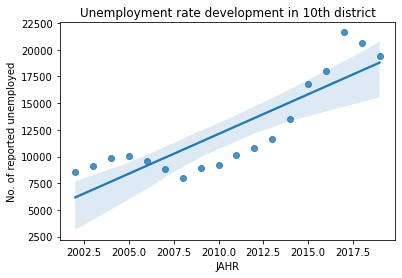

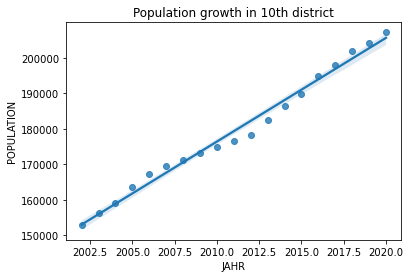

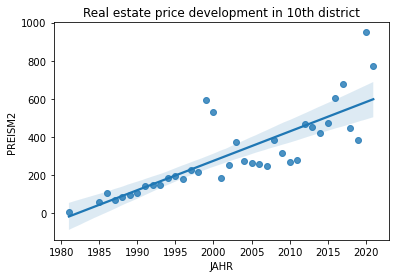

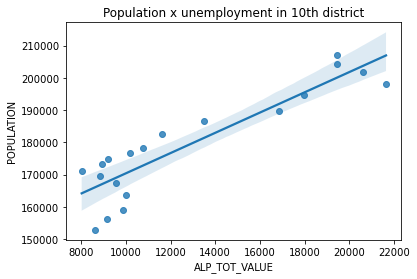

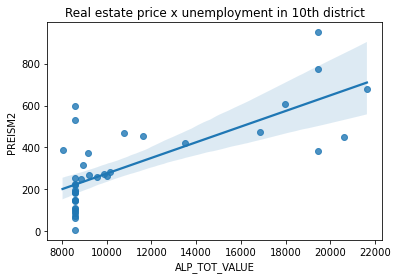

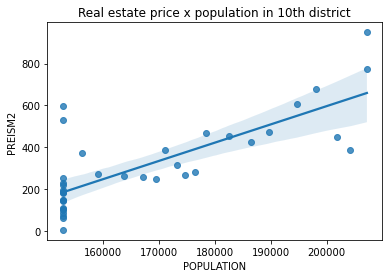

In [177]:
# Plot unemployment
unemp_10th_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == 91000]
unemp_10th_dist

sns.regplot(x = "REF_YEAR", 
            y = "ALP_TOT_VALUE", 
            data = unemp_10th_dist).set(xlabel='JAHR', ylabel='No. of reported unemployed', title='Unemployment rate development in 10th district')
plt.show()

# Plot population 
population_10th_dist = populationGrowth_fromDb[['Jahr', '10. Favoriten']]
population_10th_dist.columns = ['JAHR', 'POPULATION']

sns.regplot(x = "JAHR", 
            y = "POPULATION", 
            data = population_10th_dist).set(title='Population growth in 10th district')
plt.show()

# Plot real estate sold 
realEstate_10th_dist = realEstateVienna_fromDb[realEstateVienna_fromDb['PLZ'] == 1100]
realEstate_10th_dist['/m² Gfl.']
realEstate_10th_dist['Erwerbsdatum'] = pd.to_datetime(realEstate_10th_dist['Erwerbsdatum'], format = '%d.%m.%Y')
realEstate_10th_dist['Erwerbsdatum'] = realEstate_10th_dist['Erwerbsdatum'].dt.year

# Aggregate to median per year 
realEstate_10th_dist = realEstate_10th_dist[['Erwerbsdatum','/m² Gfl.']]
realEstate_10th_dist.columns = ['JAHR', 'PREISM2']
realEstate_10th_dist = realEstate_10th_dist.groupby(['JAHR'])['PREISM2'].median().reset_index()

sns.regplot(x = "JAHR", 
            y = "PREISM2", 
            data = realEstate_10th_dist).set(title='Real estate price development in 10th district')
plt.show()

# Set index of time series to year for correlation
population_10th_dist.set_index('JAHR', inplace=True)
unemp_10th_dist.set_index('REF_YEAR', inplace=True)
realEstate_10th_dist.set_index('JAHR', inplace=True)

# Correlation  
merged = pd.merge_asof(population_10th_dist, unemp_10th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['POPULATION', 'ALP_TOT_VALUE']]
merged.corr()

sns.regplot(x = "ALP_TOT_VALUE", 
            y = "POPULATION", 
            data = merged).set(title='Population x unemployment in 10th district')
plt.show()

merged = pd.merge_asof(realEstate_10th_dist, unemp_10th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['PREISM2', 'ALP_TOT_VALUE']]
merged.corr()

sns.regplot(x = "ALP_TOT_VALUE", 
            y = "PREISM2", 
            data = merged).set(title='Real estate price x unemployment in 10th district')
plt.show()

merged = pd.merge_asof(realEstate_10th_dist, population_10th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['PREISM2', 'POPULATION']]
merged.corr()

sns.regplot(x = "POPULATION", 
            y = "PREISM2", 
            data = merged).set(title='Real estate price x population in 10th district')
plt.show()

Now we will do the same for the 8th district (we dont use the 1st district because it is not representive due do its business purpose ond not mainly residential purposes)

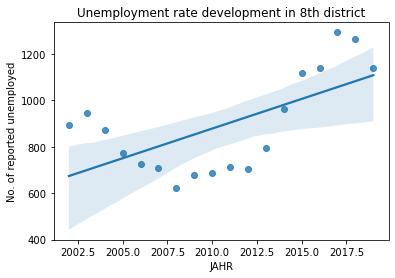

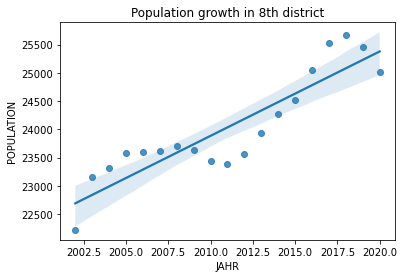

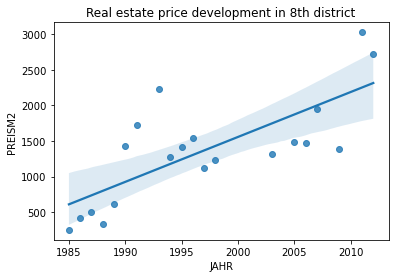

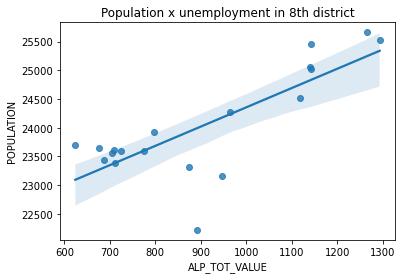

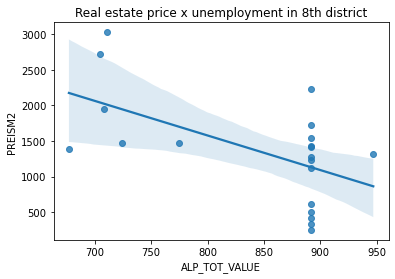

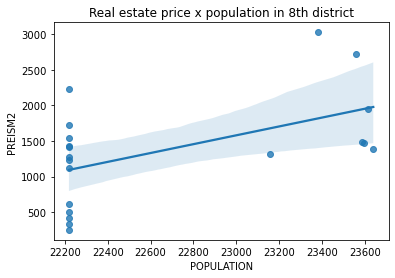

In [178]:
# Plot unemployment
unemp_8th_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == 90800]
unemp_8th_dist

sns.regplot(x = "REF_YEAR", 
            y = "ALP_TOT_VALUE", 
            data = unemp_8th_dist).set(xlabel='JAHR', ylabel='No. of reported unemployed', title='Unemployment rate development in 8th district')
plt.show()

# Plot population 
population_8th_dist = populationGrowth_fromDb[['Jahr', '8. Josefstadt']]
population_8th_dist.columns = ['JAHR', 'POPULATION']

sns.regplot(x = "JAHR", 
            y = "POPULATION", 
            data = population_8th_dist).set(title='Population growth in 8th district')
plt.show()

# Plot real estate sold 
realEstate_8th_dist = realEstateVienna_fromDb[realEstateVienna_fromDb['PLZ'] == 1080]
realEstate_8th_dist['/m² Gfl.']
realEstate_8th_dist['Erwerbsdatum'] = pd.to_datetime(realEstate_8th_dist['Erwerbsdatum'], format = '%d.%m.%Y')
realEstate_8th_dist['Erwerbsdatum'] = realEstate_8th_dist['Erwerbsdatum'].dt.year

# Aggregate to median per year 
realEstate_8th_dist = realEstate_8th_dist[['Erwerbsdatum','/m² Gfl.']]
realEstate_8th_dist.columns = ['JAHR', 'PREISM2']
realEstate_8th_dist = realEstate_8th_dist.groupby(['JAHR'])['PREISM2'].median().reset_index()

sns.regplot(x = "JAHR", 
            y = "PREISM2", 
            data = realEstate_8th_dist).set(title='Real estate price development in 8th district')
plt.show()

# Set index of time series to year for correlation
population_8th_dist.set_index('JAHR', inplace=True)
unemp_8th_dist.set_index('REF_YEAR', inplace=True)
realEstate_8th_dist.set_index('JAHR', inplace=True)

# Correlation  
merged = pd.merge_asof(population_8th_dist, unemp_8th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['POPULATION', 'ALP_TOT_VALUE']]
merged.corr()

sns.regplot(x = "ALP_TOT_VALUE", 
            y = "POPULATION", 
            data = merged).set(title='Population x unemployment in 8th district')
plt.show()

merged = pd.merge_asof(realEstate_8th_dist, unemp_8th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['PREISM2', 'ALP_TOT_VALUE']]
merged.corr()

sns.regplot(x = "ALP_TOT_VALUE", 
            y = "PREISM2", 
            data = merged).set(title='Real estate price x unemployment in 8th district')
plt.show()

merged = pd.merge_asof(realEstate_8th_dist, population_8th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['PREISM2', 'POPULATION']]
merged.corr()

sns.regplot(x = "POPULATION", 
            y = "PREISM2", 
            data = merged).set(title='Real estate price x population in 8th district')
plt.show()

Lets take a deeper look at the correlations.

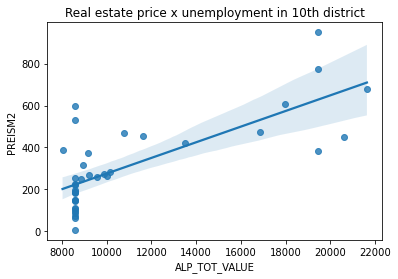

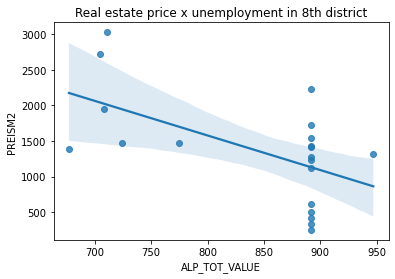

In [179]:
merged = pd.merge_asof(realEstate_10th_dist, unemp_10th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['PREISM2', 'ALP_TOT_VALUE']]
merged.corr()

sns.regplot(x = "ALP_TOT_VALUE", 
            y = "PREISM2", 
            data = merged).set(title='Real estate price x unemployment in 10th district')
plt.show()


merged = pd.merge_asof(realEstate_8th_dist, unemp_8th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['PREISM2', 'ALP_TOT_VALUE']]
merged.corr()

sns.regplot(x = "ALP_TOT_VALUE", 
            y = "PREISM2", 
            data = merged).set(title='Real estate price x unemployment in 8th district')
plt.show()


In [ ]:
MAP REDUCE 

When we look at the correlation of real estate prices to unemployed people we see that higher unemployment in the 8th district leads to lower real estate prices. But in the 10th district it is the other way round: higher unemployment in the 10th district leads to higher real estate prices. This does not really make sense and sounds like a nonsense correlation (spurious statistical relationship). So what can the other key drivers be? Lets look at the correlation between real estate prices and population.

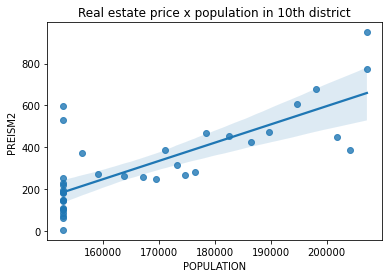

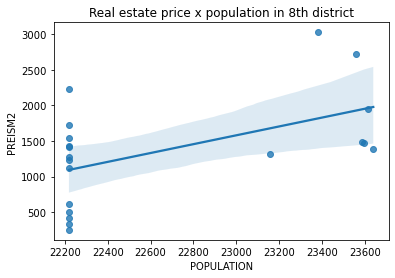

In [180]:
merged = pd.merge_asof(realEstate_10th_dist, population_10th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['PREISM2', 'POPULATION']]
merged.corr()

sns.regplot(x = "POPULATION", 
            y = "PREISM2", 
            data = merged).set(title='Real estate price x population in 10th district')
plt.show()

merged = pd.merge_asof(realEstate_8th_dist, population_8th_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['PREISM2', 'POPULATION']]
merged.corr()

sns.regplot(x = "POPULATION", 
            y = "PREISM2", 
            data = merged).set(title='Real estate price x population in 8th district')
plt.show()

We can see, that just population is the key driver for real estate prices. The 10th district had a much higher population growth than the 8th district over time. We will use the population growth of each district to forecast the future price development for the real estate prices in each district of Vienna. 

## All Districts
Now we analyze all the districts

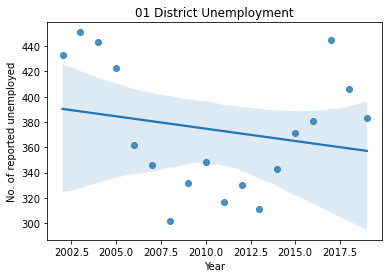

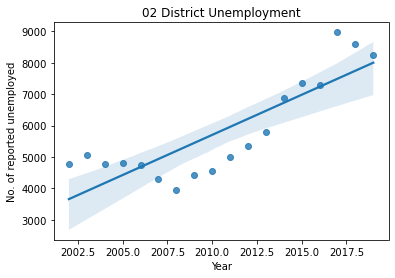

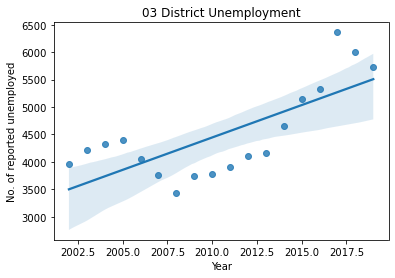

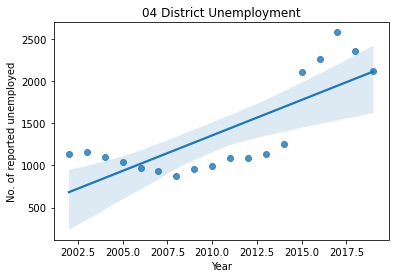

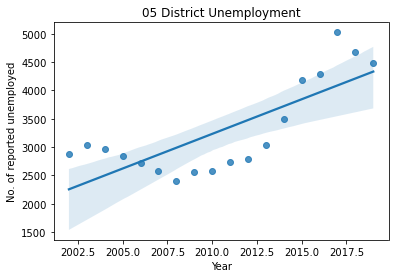

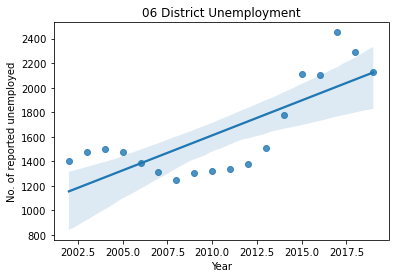

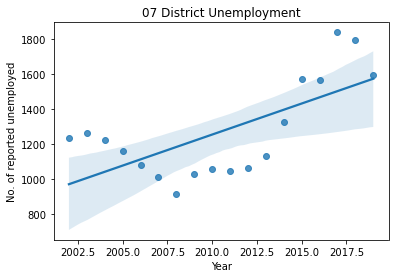

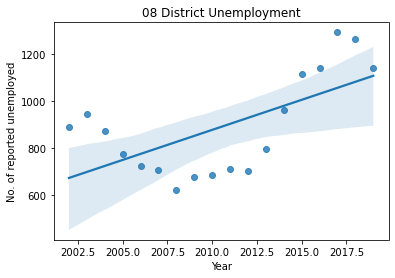

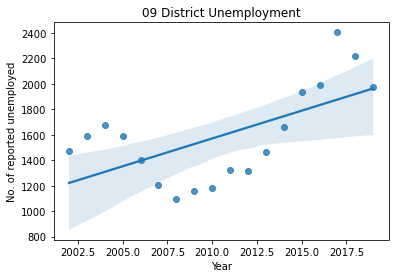

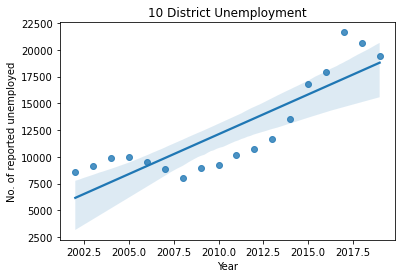

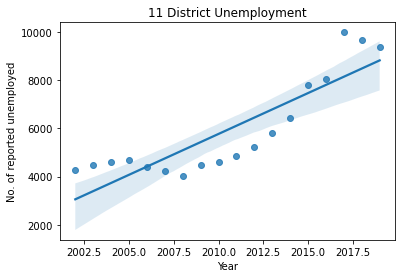

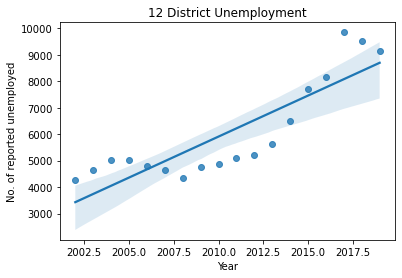

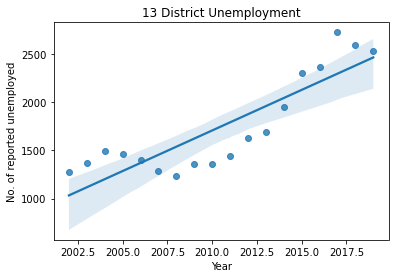

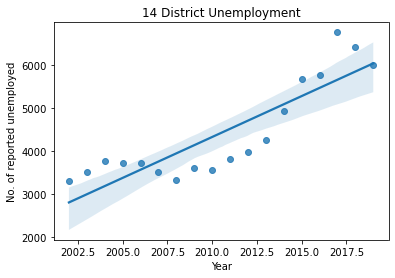

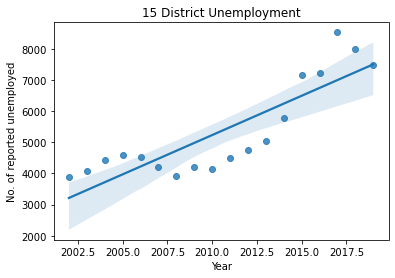

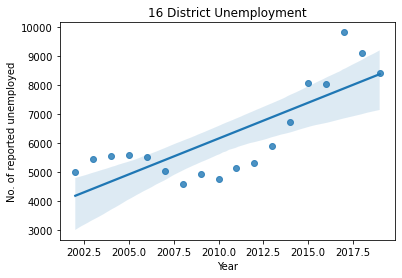

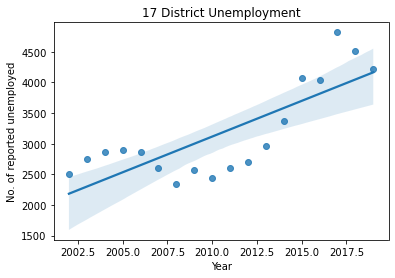

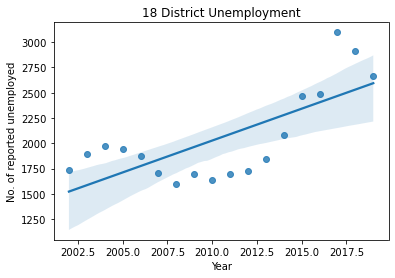

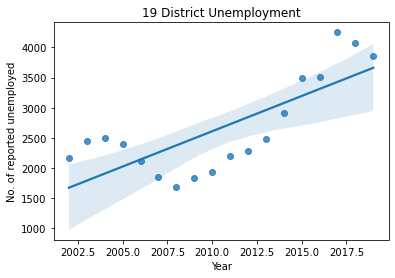

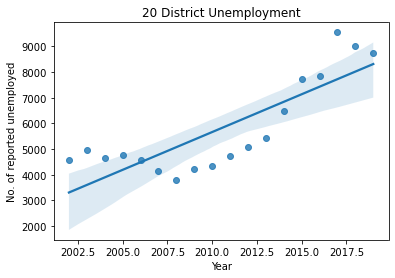

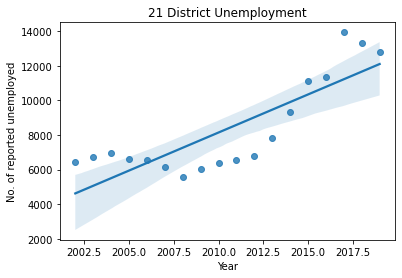

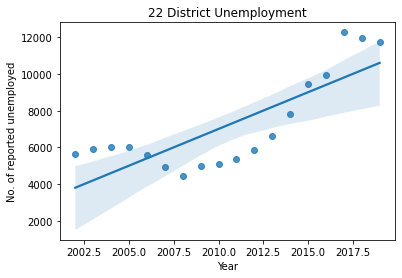

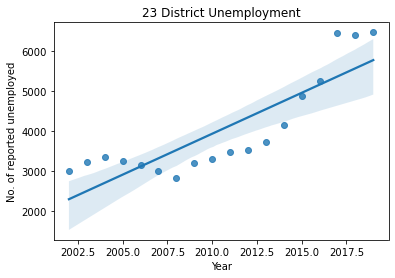

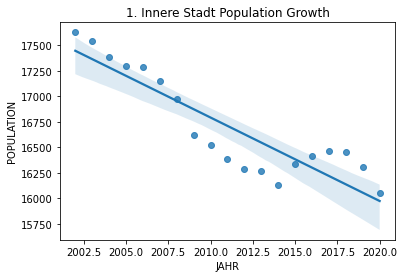

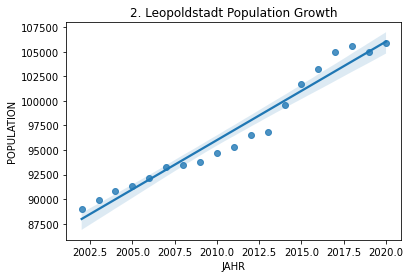

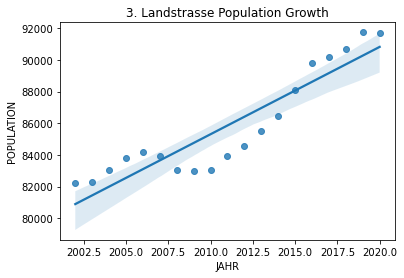

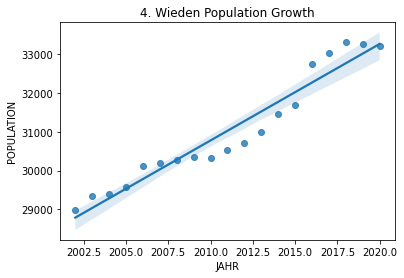

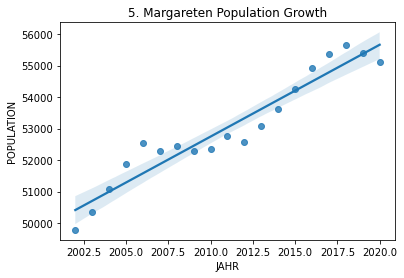

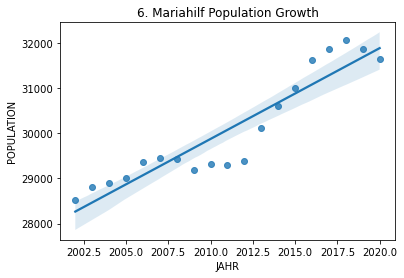

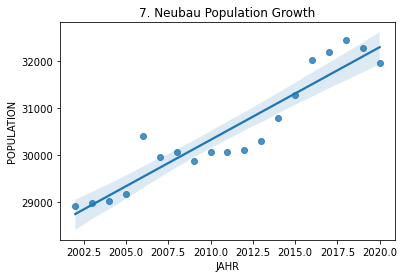

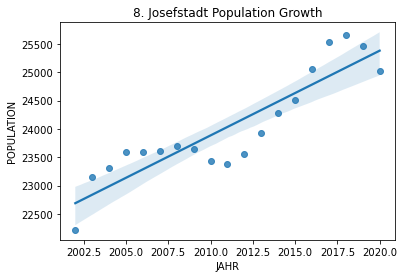

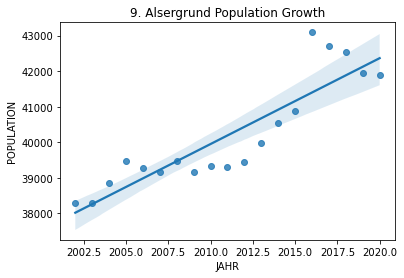

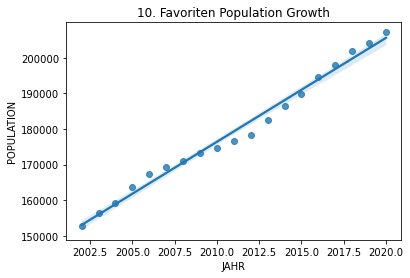

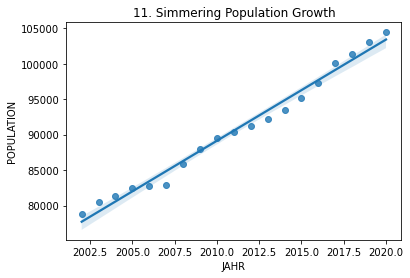

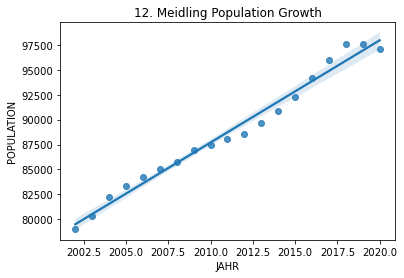

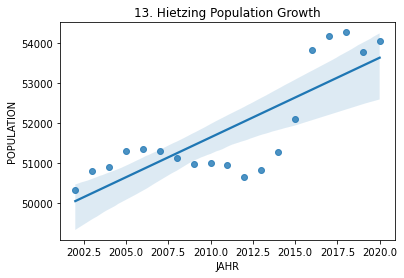

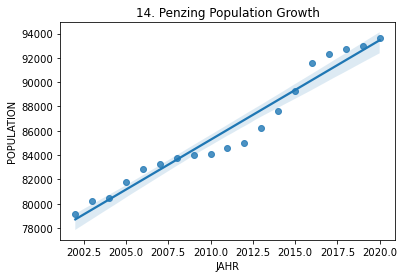

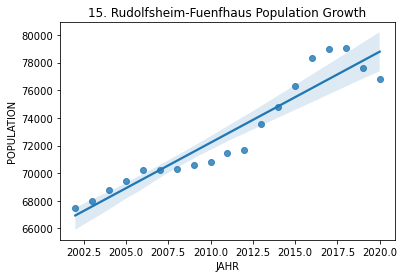

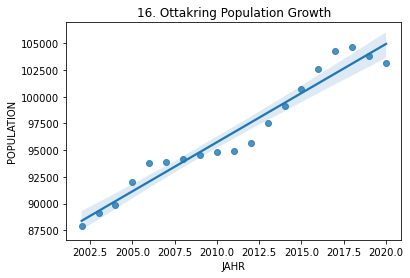

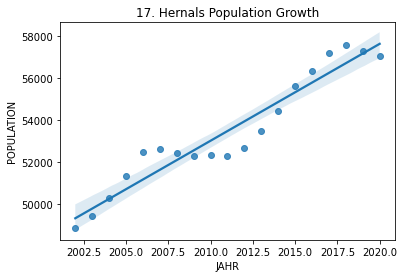

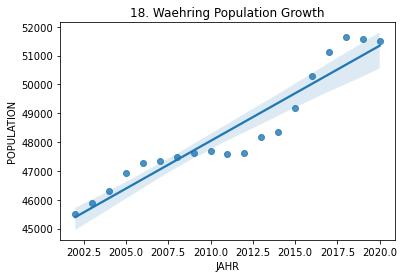

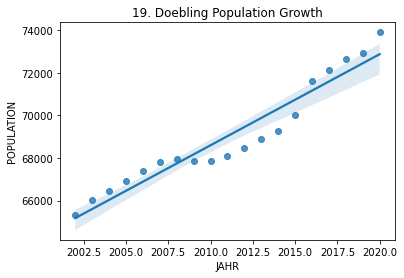

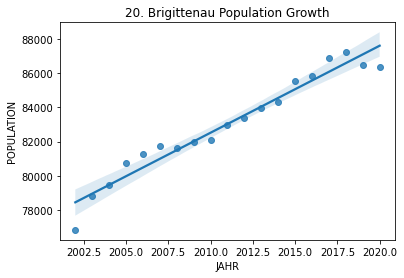

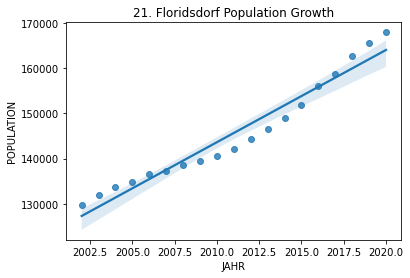

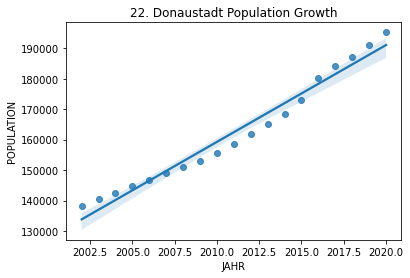

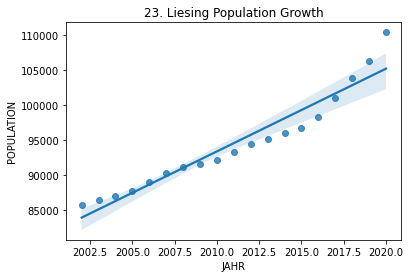

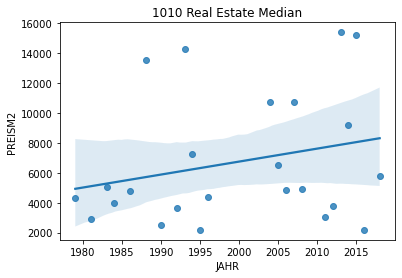

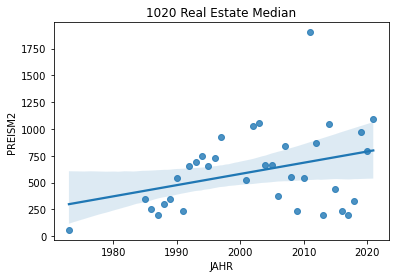

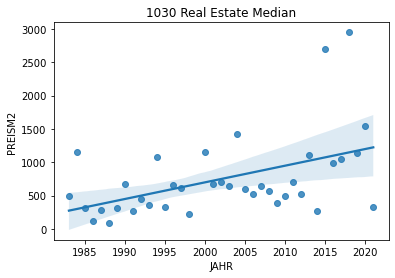

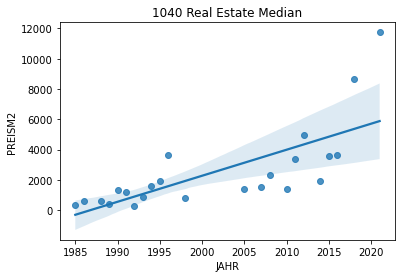

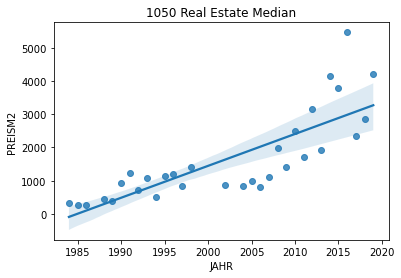

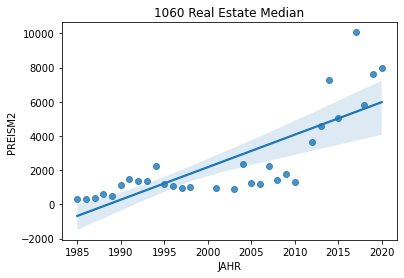

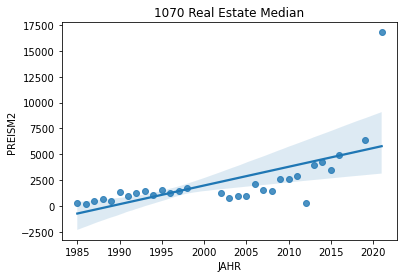

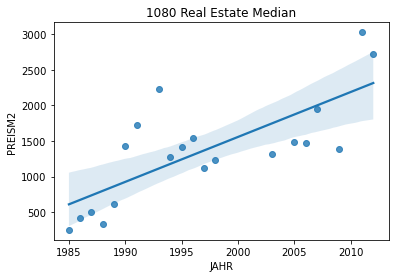

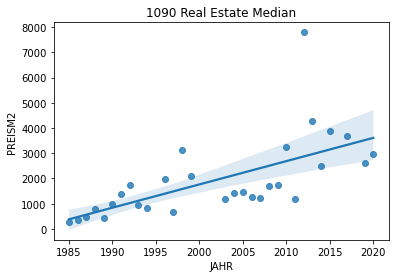

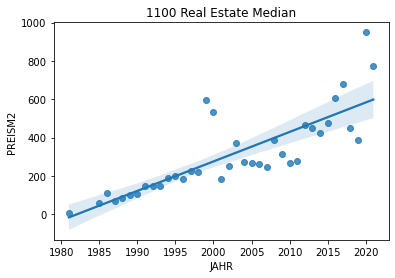

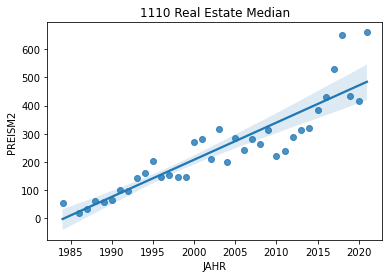

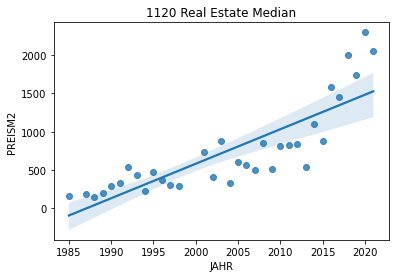

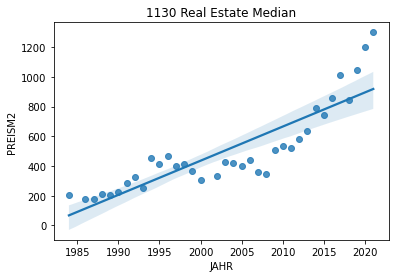

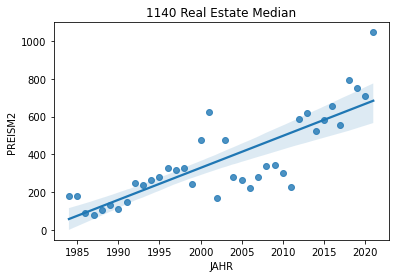

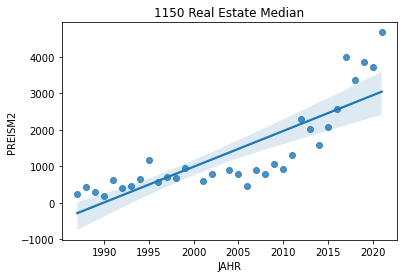

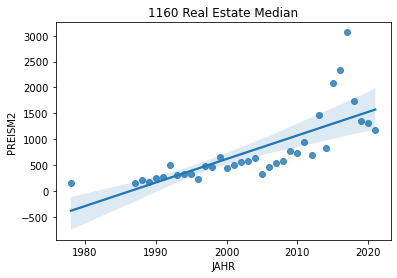

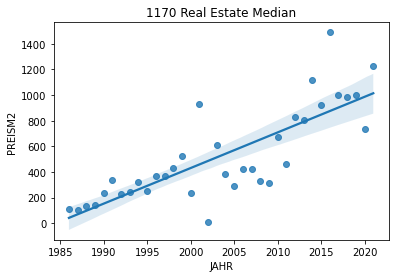

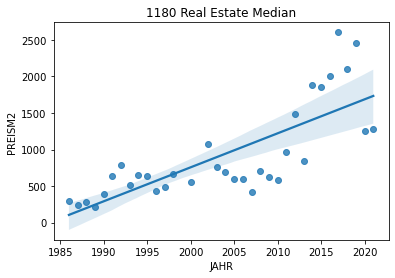

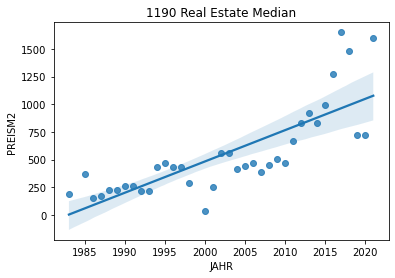

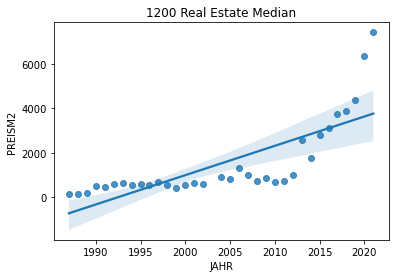

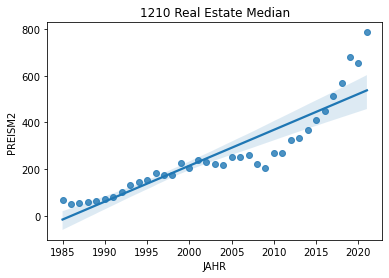

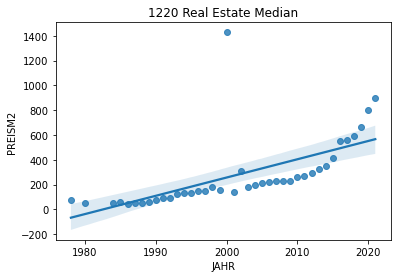

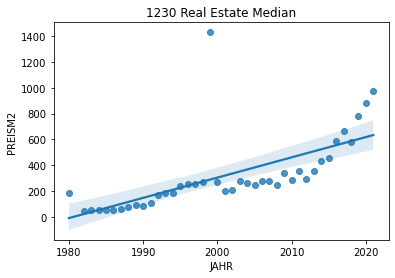

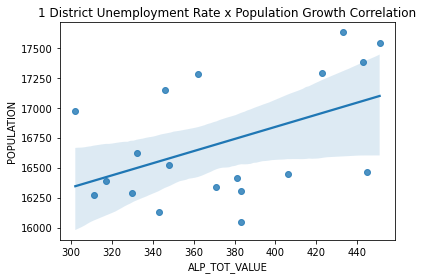

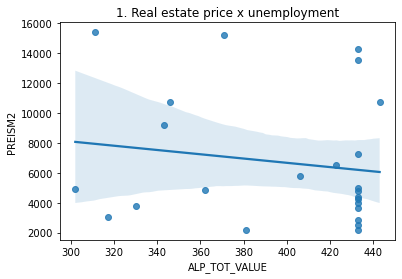

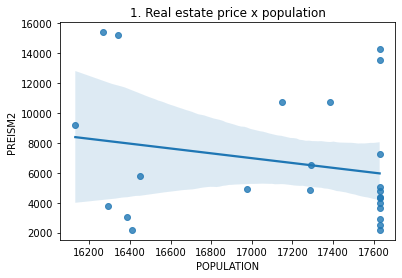

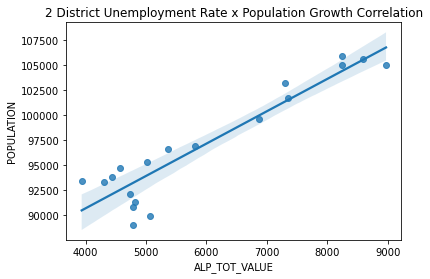

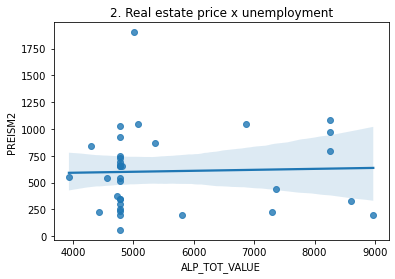

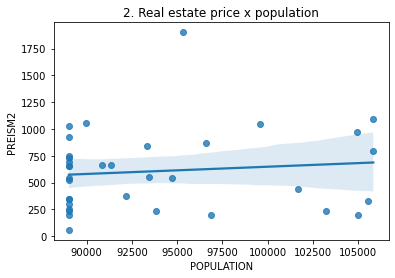

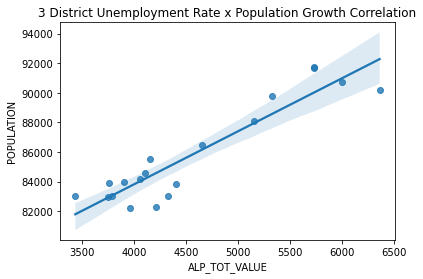

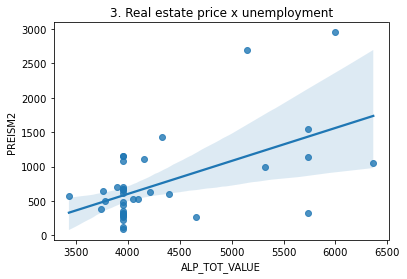

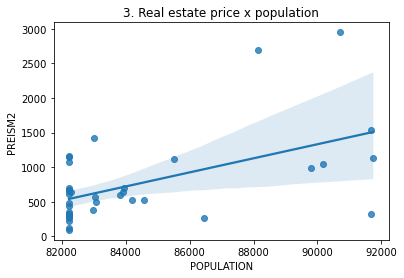

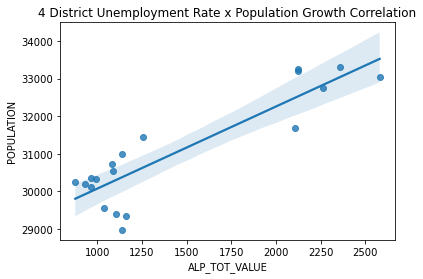

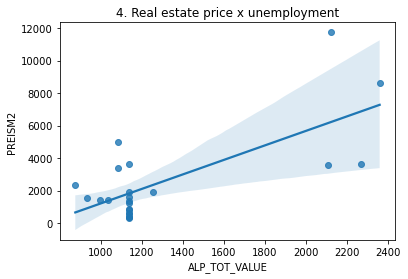

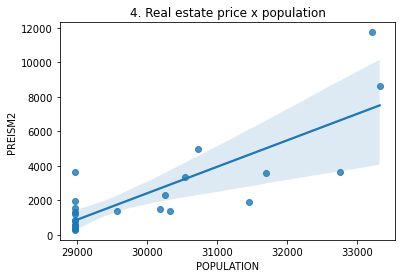

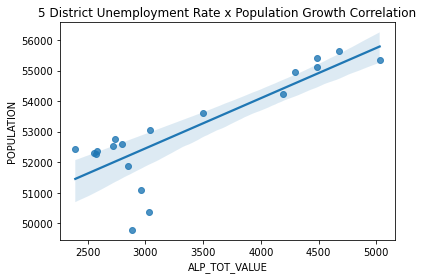

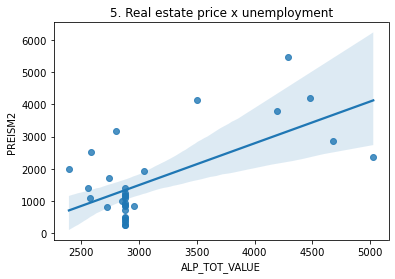

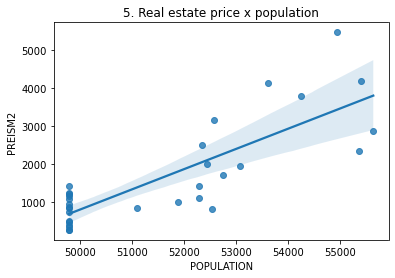

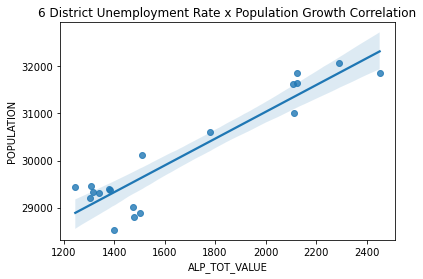

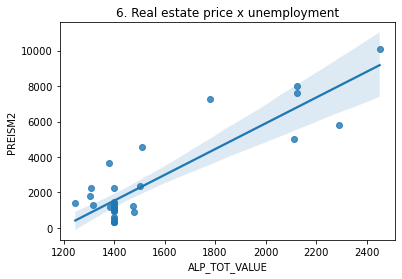

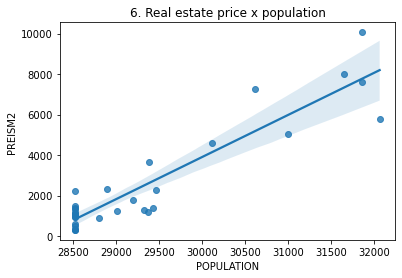

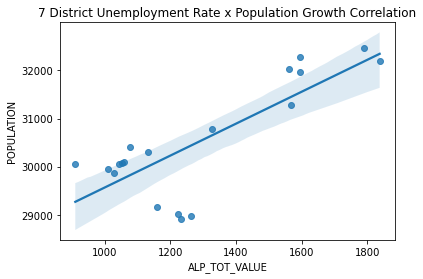

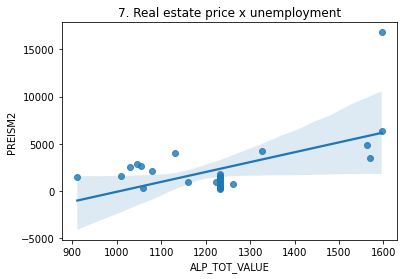

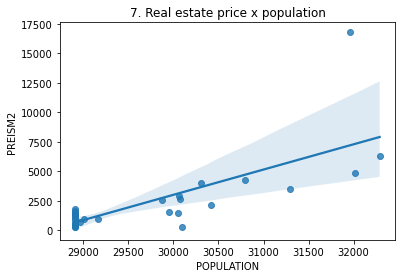

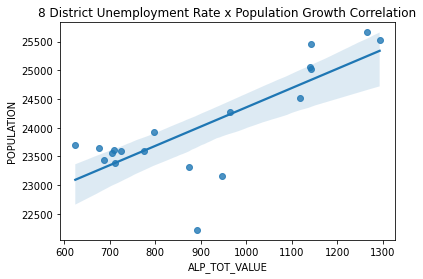

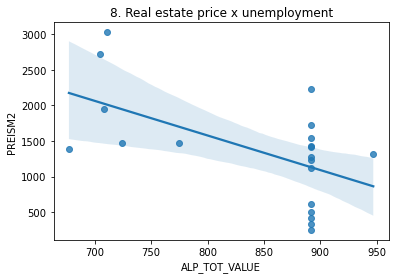

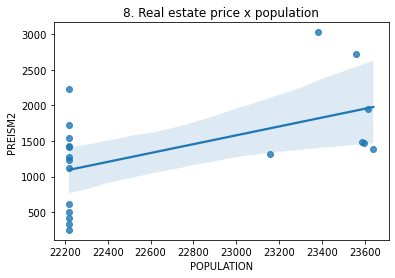

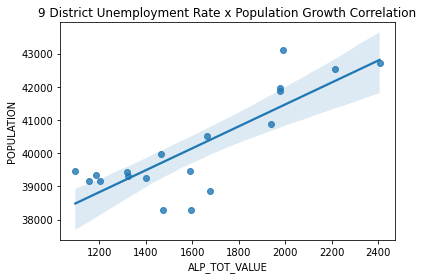

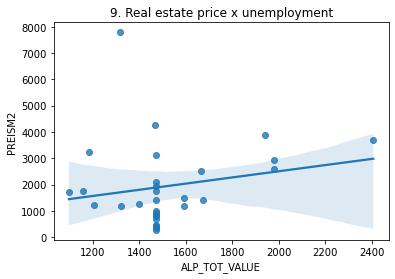

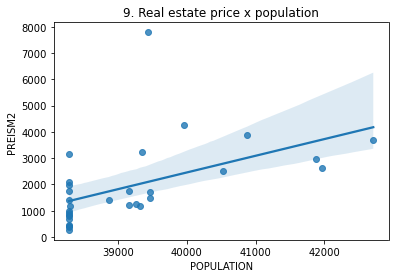

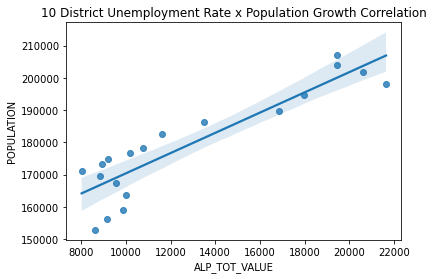

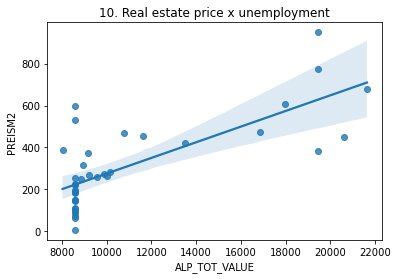

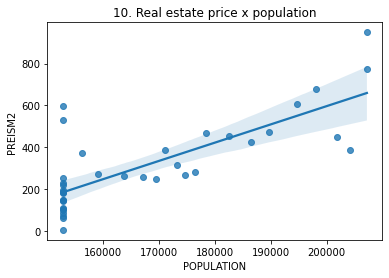

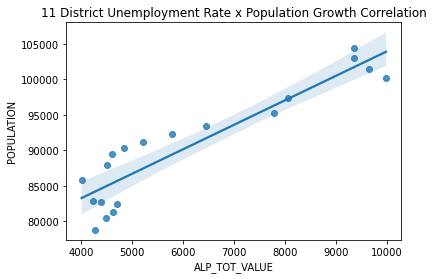

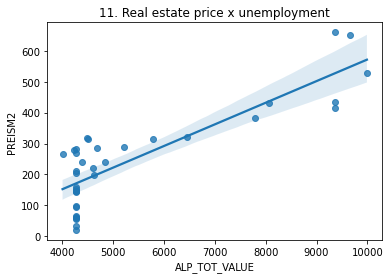

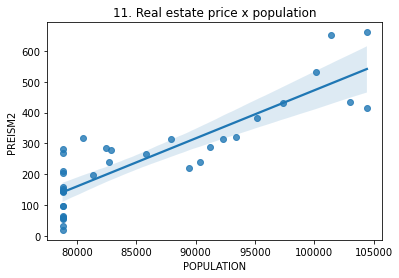

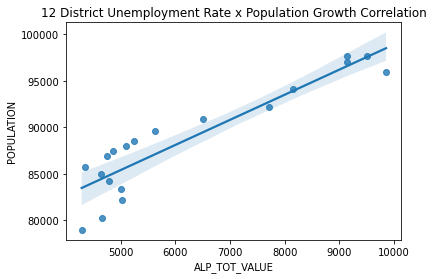

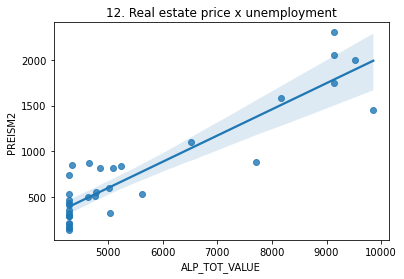

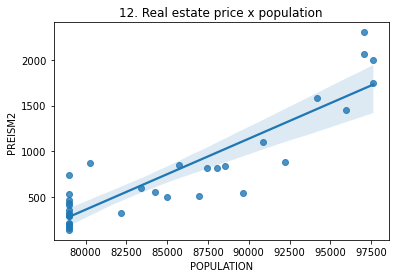

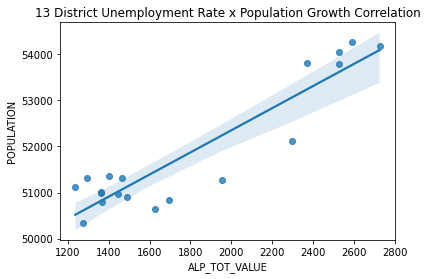

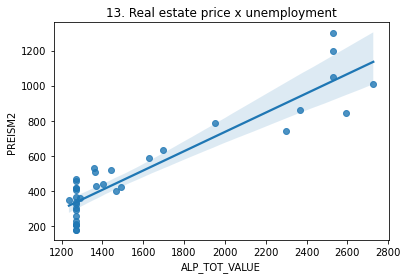

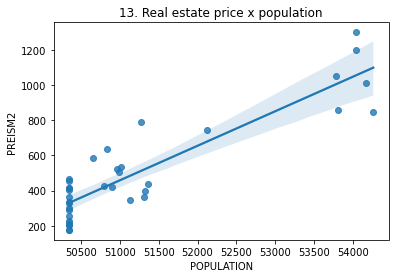

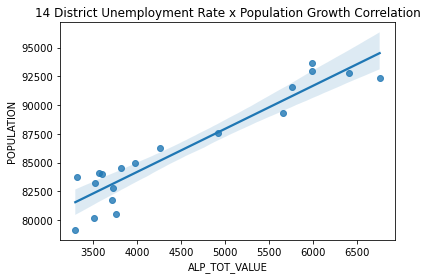

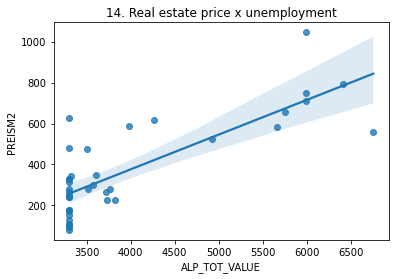

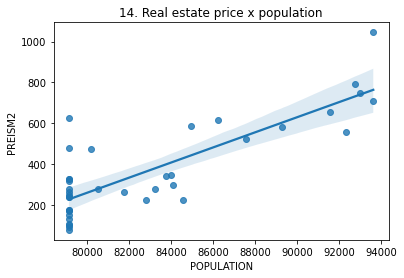

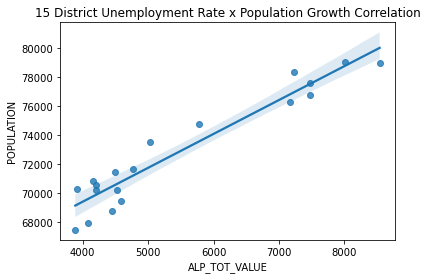

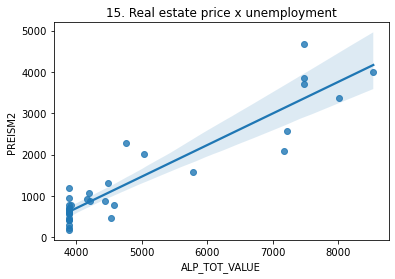

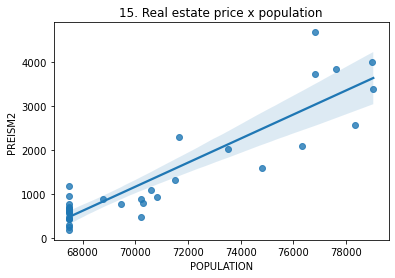

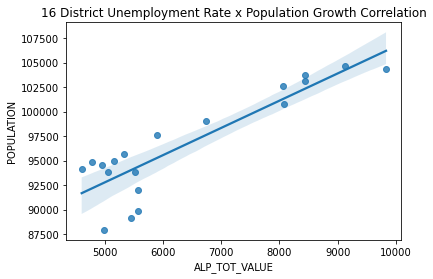

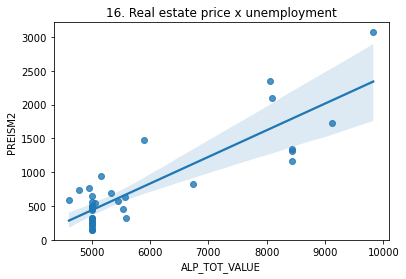

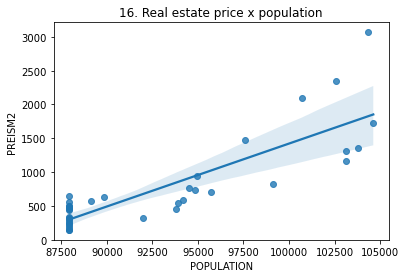

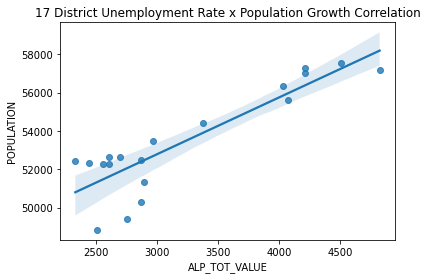

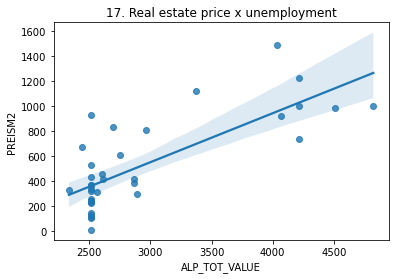

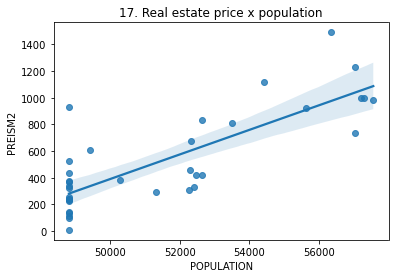

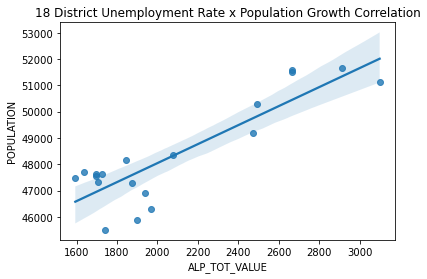

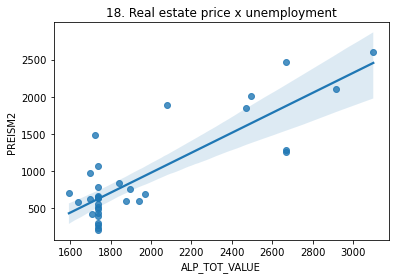

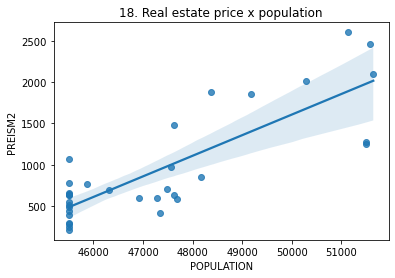

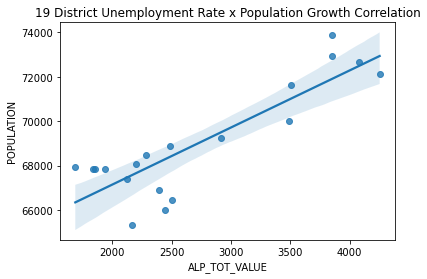

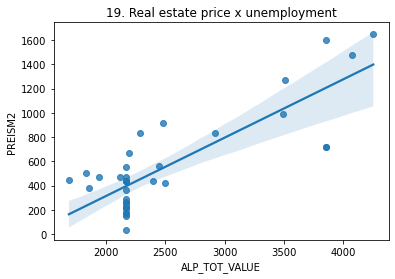

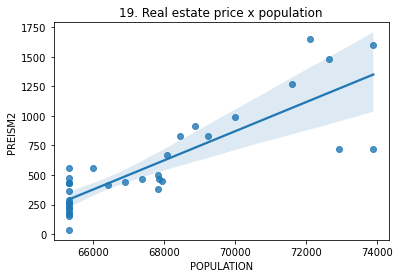

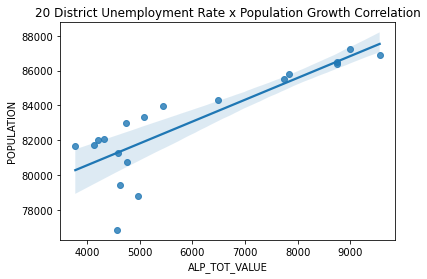

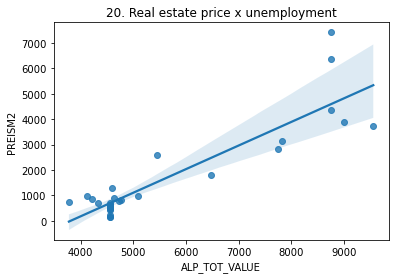

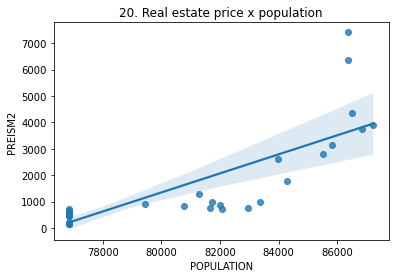

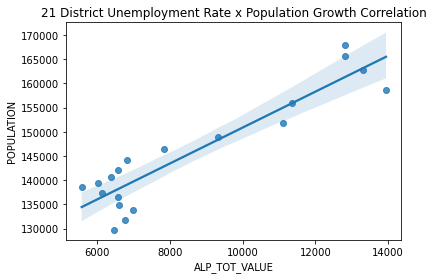

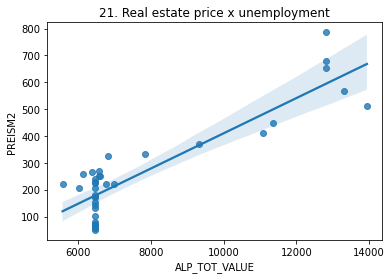

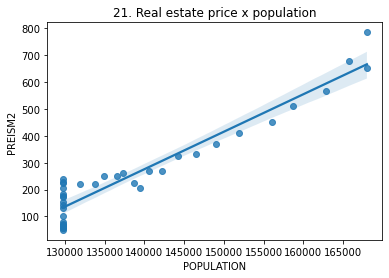

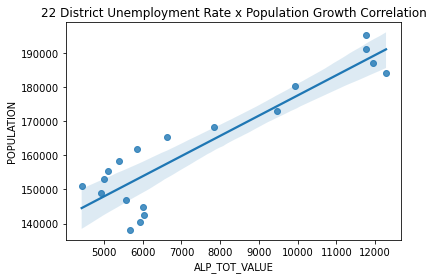

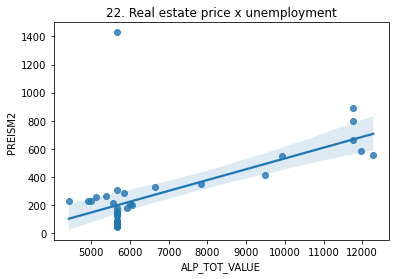

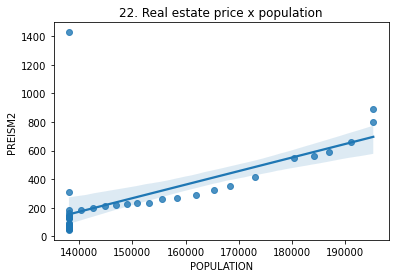

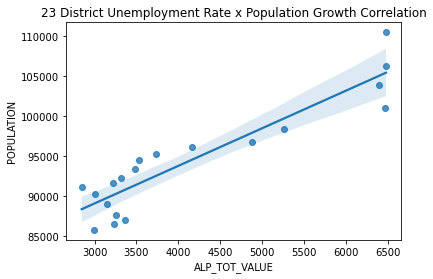

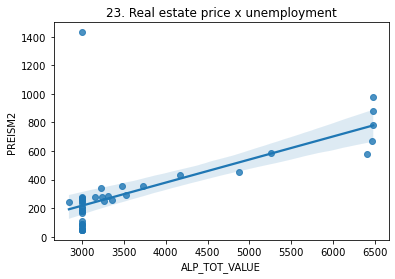

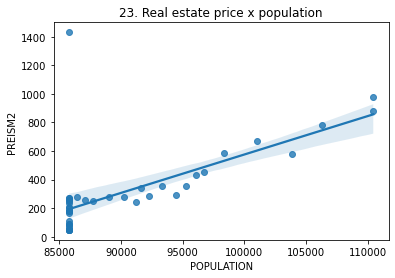

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot unemployment
unemployment = [0] * 23
i = 0
districts_unemp = [90100, 90200, 90300, 90400, 90500, 90600, 90700, 90800, 90900, 91000, 91100, 91200, 91300, 91400, 91500, 91600, 91700, 91800, 91900, 92000, 92100, 92200, 92300]
for plz in districts_unemp:
    unemp_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == plz]
    unemployment[i] = unemp_dist
    i += 1
    
    sns.regplot(x = "REF_YEAR", 
                y = "ALP_TOT_VALUE", 
                data = unemp_dist).set(xlabel='Year', ylabel='No. of reported unemployed', title=str(plz)[1:3] + ' District Unemployment')
    plt.show()
    

# Plot population 
population = [0] * 23
i = 0
districts_pop = ['1. Innere Stadt','2. Leopoldstadt','3. Landstrasse','4. Wieden','5. Margareten','6. Mariahilf','7. Neubau','8. Josefstadt','9. Alsergrund','10. Favoriten','11. Simmering','12. Meidling','13. Hietzing','14. Penzing','15. Rudolfsheim-Fuenfhaus','16. Ottakring','17. Hernals','18. Waehring','19. Doebling','20. Brigittenau','21. Floridsdorf','22. Donaustadt','23. Liesing']
for district in districts_pop:
    population_dist = populationGrowth_fromDb[['Jahr', district]]
    population_dist.columns = ['JAHR', 'POPULATION']
    population[i] = population_dist
    i += 1

    sns.regplot(x = "JAHR", 
                y = "POPULATION", 
                data = population_dist).set(title=district +' Population Growth')
    plt.show()

# Plot real estate sold 
realestate = [0] * 23
i = 0
districts_realEstate = [1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230]
for plz in districts_realEstate:
    realEstate_dist = realEstateVienna_fromDb[realEstateVienna_fromDb['PLZ'] == plz]
    realEstate_dist['/m² Gfl.']
    realEstate_dist['Erwerbsdatum'] = pd.to_datetime(realEstate_dist['Erwerbsdatum'], format = '%d.%m.%Y')
    realEstate_dist['Erwerbsdatum'] = realEstate_dist['Erwerbsdatum'].dt.year

    # Aggregate to median per year 
    realEstate_dist = realEstate_dist[['Erwerbsdatum','/m² Gfl.']]
    realEstate_dist.columns = ['JAHR', 'PREISM2']
    realEstate_dist = realEstate_dist.groupby(['JAHR'])['PREISM2'].median().reset_index()
    realestate[i] = realEstate_dist
    i += 1

    sns.regplot(x = "JAHR", 
                y = "PREISM2", 
                data = realEstate_dist).set(title=str(plz) + ' Real Estate Median')
    plt.show()

for i in range(0,23):
    # Set index of time series to year for correlation
    population[i].set_index('JAHR', inplace=True)
    unemployment[i].set_index('REF_YEAR', inplace=True)
    realestate[i].set_index('JAHR', inplace=True)

    # Correlation graph
    merged = pd.merge_asof(population[i], unemployment[i], left_index=True, right_index=True, direction='nearest')
    merged = merged[['POPULATION', 'ALP_TOT_VALUE']]
    merged.corr()

    sns.regplot(x = "ALP_TOT_VALUE", 
                y = "POPULATION", 
                data = merged).set(title=str(i+1) + ' District Unemployment Rate x Population Growth Correlation')
    plt.show()
    
    
    
    merged = pd.merge_asof(realestate[i], unemployment[i], left_index=True, right_index=True, direction='nearest')
    merged = merged[['PREISM2', 'ALP_TOT_VALUE']]
    merged.corr()

    sns.regplot(x = "ALP_TOT_VALUE", 
                y = "PREISM2", 
                data = merged).set(title=str(i+1) + '. Real estate price x unemployment')
    plt.show()

    merged = pd.merge_asof(realestate[i], population[i], left_index=True, right_index=True, direction='nearest')
    merged = merged[['PREISM2', 'POPULATION']]
    merged.corr()

    sns.regplot(x = "POPULATION", 
                y = "PREISM2", 
                data = merged).set(title=str(i+1) + '. Real estate price x population')
    plt.show()

FORECAST: 23. charts für jeden bezirk forecast des real estate preis/m2 anhand der historischen populationsdaten

## MapReduce: Correlation analysis 
In this step of our analysis, we are going to calculate the Pearson, Spearman and Kendall correlation coefficients between population growth and unemployment rate in all districts of Vienna! 

For this, we'll use Mr. Job and construct a proper mapper and reducer. 

In the map step, we aggregate our data grouped by district of Vienna into a shared data frame for processing, in the reducer step we calculate all three types of correlation coefficient per district.

In [181]:
%%file correlationCalc.py
from mrjob.job import MRJob
from pymongo import MongoClient
import pandas as pd

# Connect to DB
CONNECTION_STRING = "mongodb://127.0.0.1:27017"
myclient = MongoClient(CONNECTION_STRING)
db = myclient["immodb"]

# Get data from DB
unemployment_fromDb = pd.DataFrame(list(db["unemploymentData"].find()))
unemployment_fromDb = unemployment_fromDb.set_index("_id")
populationGrowth_fromDb = pd.DataFrame(list(db["populationGrowth"].find()))
populationGrowth_fromDb = populationGrowth_fromDb.set_index("_id")

# Define MapReduce
class CorrelationCalc(MRJob):  
    def mapper(self, _, line):
        line = line.split(',')
        unemp_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == int(line[0])]
        
        population_dist = populationGrowth_fromDb[['Jahr', line[1]]]
        population_dist.columns = ['JAHR', 'POPULATION']

        population_dist.set_index('JAHR', inplace=True)
        unemp_dist.set_index('REF_YEAR', inplace=True)

        districtData = pd.merge_asof(population_dist, unemp_dist, left_index=True, right_index=True, direction='nearest')
        districtData = districtData[['POPULATION', 'ALP_TOT_VALUE']]
        yield (line[0], (districtData.corr(method='pearson')['ALP_TOT_VALUE']['POPULATION'], districtData.corr(method='spearman')['ALP_TOT_VALUE']['POPULATION'], districtData.corr(method='kendall')['ALP_TOT_VALUE']['POPULATION']))
        
    def reducer(self, districtCode, districtData):
        yield (districtCode, next(districtData))
        
if __name__ == '__main__':
    CorrelationCalc.run()

Overwriting correlationCalc.py


In [182]:
!python correlationCalc.py ./district.data

"90100"	[0.4736745764833778,0.44405445257704984,0.31671690438500405]
"90200"	[0.931940698040843,0.7889425945983554,0.6099732973340818]
"90300"	[0.9258657998270569,0.7626152555127595,0.6217035530520449]
"90400"	[0.8861959278531543,0.6625713669874953,0.4809404844364876]
"90500"	[0.8272868351710793,0.6967969077987699,0.5395917630263032]
"90600"	[0.9304555835172785,0.6660816788655748,0.4926707401544508]
"90700"	[0.7911727666078561,0.6257130922676611,0.4692102287185245]
"90800"	[0.7835836249266728,0.5985081752125454,0.4105589501287089]
"90900"	[0.8226003387548758,0.6467749635361378,0.4926707401544508]
"91000"	[0.903425760766964,0.8661694559161032,0.7155455987957499]
"91100"	[0.9194623917140182,0.8749452356113018,0.727275854513713]
"91200"	[0.9171458133735367,0.8951295289102585,0.7507363659496392]
"91300"	[0.9221408887610354,0.6564283212008563,0.4692102287185245]
"91400"	[0.9421454072501708,0.892496795001699,0.7390061102316762]
"91500"	[0.958471818169276,0.8819658593674606,0.7390061102316762

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory C:\Users\CHRIST~1\AppData\Local\Temp\correlationCalc.Christian.20220426.153746.780259
Running step 1 of 1...
job output is in C:\Users\CHRIST~1\AppData\Local\Temp\correlationCalc.Christian.20220426.153746.780259\output
Streaming final output from C:\Users\CHRIST~1\AppData\Local\Temp\correlationCalc.Christian.20220426.153746.780259\output...
Removing temp directory C:\Users\CHRIST~1\AppData\Local\Temp\correlationCalc.Christian.20220426.153746.780259...
